In [ ]:
# LES ETAPES :

#1 INSTALLER LES PACKAGES
#2 IMPORTER LE DATASET A PARTIR DE NOTRE DRIVE
#3 ENTRAINEMENT DU MODELE
#4 VALIDATION
#5 PERFORMENCE & INTERPRETATION & COURBE DU LEARNING RATE
#6 TEST
#7 ENREGISTREMENT DU MODELE ENTRAINE
#8 REFAIRE LES ETAPES 3 A 7 POUR AMELIORER LA PERFORMENCE DE NOTRE MODELE


In [3]:
# installation de ultralytics pour les modeles pre-entrainé
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.2/922.2 kB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 73.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [21]:
#1 INSTALLER LES PACKAGES
from ultralytics import YOLO
from google.colab import drive # Pour l'utilisation du dataset à partir du Drive
import glob # Pour acceder aux images test sans pour autant changer mon fichier YAML parceque model.test() n'exite pas
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
#2 IMPORTER LE DATASET A PARTIR DE NOTRE DRIVE
drive.mount('/content/drive') # Se connecter à mon Drive afin d'acceder sur mon Dataset


Mounted at /content/drive


In [6]:
dataset_path = "/content/drive/MyDrive/Colab Notebooks/DATASET" # Le chemin du dataset contenant sur le Drive

print("Extraction du dataset terminée !")

Extraction du dataset terminée !


In [7]:
#3 ENTRAINEMENT DU MODELE
model = YOLO('yolov8m.pt') # on utilise le modele pré-entraine moyen de Yolov8
# On entraine le modele sur le jeu Train avec les parametres que j'ai defini
results_1 = model.train(data=dataset_path + "/data.yaml", epochs=100 , imgsz=800 , batch=16 , workers=4)


100%|██████████| 49.7M/49.7M [00:00<00:00, 309MB/s]


Ultralytics 8.3.84 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/Colab Notebooks/DATASET/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=T

100%|██████████| 755k/755k [00:00<00:00, 95.4MB/s]


Overriding model.yaml nc=80 with nc=262

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralyti

100%|██████████| 5.35M/5.35M [00:00<00:00, 243MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Colab Notebooks/DATASET/train/labels... 1087 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1087/1087 [16:45<00:00,  1.08it/s]

train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/DATASET/train/images/2e03f7cc-c11-1_jpg.rf.d3c778c82de2b6b0091f48eeb243e751.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/DATASET/train/images/54784ce7-e21-13_jpg.rf.b9d5fd8d90af78db254812d375e8f2d0.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/DATASET/train/images/sign4_jpg.rf.7f3fd027187967b5719258c51001266c.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/DATASET/train/images/sign4_jpg.rf.d3a9c7f42b77a7419ed38d8265ca1f25.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/DATASET/train/images/sign4_jpg.rf.f99c9c00772dc3dc7149862b7cc67b9d.jpg: 1 duplicate labels removed


train: New cache created: /content/drive/MyDrive/Colab Notebooks/DATASET/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.5' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/Colab Notebooks/DATASET/valid/labels... 136 images, 0 backgrounds, 0 corrupt: 100%|██████████| 136/136 [02:04<00:00,  1.09it/s]

val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/DATASET/valid/images/5d579e2a-a29-3_jpg.rf.89929ab8edae50f7c7b5e6906a5231ad.jpg: 1 duplicate labels removed
val: New cache created: /content/drive/MyDrive/Colab Notebooks/DATASET/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=3.8e-05, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 800 train, 800 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      10.5G     0.8176      5.492      1.376         79        800: 100%|██████████| 68/68 [01:04<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.09it/s]


                   all        136        407    0.00335      0.184     0.0101    0.00966

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      10.3G     0.4116       4.66      1.117         92        800: 100%|██████████| 68/68 [01:04<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]


                   all        136        407      0.759     0.0275     0.0352     0.0314

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      10.4G     0.3367      4.108       1.06         85        800: 100%|██████████| 68/68 [01:03<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]


                   all        136        407      0.815     0.0567     0.0736     0.0657

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      10.3G     0.2991      3.699      1.018         93        800: 100%|██████████| 68/68 [01:03<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.51it/s]


                   all        136        407      0.811     0.0851      0.114      0.106

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      10.3G     0.2922      3.384       1.01         85        800: 100%|██████████| 68/68 [01:03<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]


                   all        136        407      0.768      0.129      0.167      0.155

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      10.3G     0.2732      3.121     0.9935         87        800: 100%|██████████| 68/68 [01:04<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.51it/s]


                   all        136        407      0.572      0.247      0.246      0.228

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      10.3G     0.2623      2.887     0.9729         97        800: 100%|██████████| 68/68 [01:04<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]


                   all        136        407      0.574      0.244      0.274      0.256

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      10.3G     0.2568      2.655     0.9688         98        800: 100%|██████████| 68/68 [01:04<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.53it/s]


                   all        136        407      0.567      0.318      0.321      0.302

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      10.3G     0.2379      2.565     0.9535         85        800: 100%|██████████| 68/68 [01:03<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.34it/s]


                   all        136        407      0.465      0.334      0.332      0.314

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      10.4G     0.2355      2.371     0.9527        103        800: 100%|██████████| 68/68 [01:04<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


                   all        136        407      0.524      0.387      0.376      0.357

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      10.3G     0.2303      2.258     0.9523        105        800: 100%|██████████| 68/68 [01:04<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


                   all        136        407      0.496      0.404      0.416      0.391

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      10.3G     0.2324      2.159     0.9444         81        800: 100%|██████████| 68/68 [01:04<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


                   all        136        407      0.488      0.444      0.444      0.418

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      10.3G     0.2319      2.064     0.9445         96        800: 100%|██████████| 68/68 [01:04<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.57it/s]


                   all        136        407      0.641      0.386      0.495      0.469

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      10.3G     0.2158      1.966      0.937        105        800: 100%|██████████| 68/68 [01:04<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.51it/s]


                   all        136        407      0.518      0.488      0.526        0.5

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      10.3G     0.2099      1.888     0.9313         95        800: 100%|██████████| 68/68 [01:04<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.55it/s]


                   all        136        407      0.559      0.496       0.54      0.514

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      10.3G     0.2024      1.805     0.9327         83        800: 100%|██████████| 68/68 [01:03<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.57it/s]


                   all        136        407      0.599      0.498      0.563      0.534

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      10.3G     0.2099      1.757     0.9267         96        800: 100%|██████████| 68/68 [01:04<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.57it/s]


                   all        136        407      0.671      0.476      0.577      0.548

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      10.3G     0.1988       1.68     0.9259         89        800: 100%|██████████| 68/68 [01:03<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.57it/s]


                   all        136        407      0.563       0.52      0.561      0.529

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      10.3G     0.2109      1.625     0.9265         71        800: 100%|██████████| 68/68 [01:04<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.59it/s]


                   all        136        407      0.632       0.51      0.619      0.586

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      10.3G     0.2057      1.612     0.9258        108        800: 100%|██████████| 68/68 [01:03<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


                   all        136        407      0.521      0.594      0.629        0.6

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      10.3G      0.191      1.538     0.9164        115        800: 100%|██████████| 68/68 [01:04<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.54it/s]


                   all        136        407      0.617      0.556      0.641      0.609

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      10.3G     0.1919      1.459     0.9092        100        800: 100%|██████████| 68/68 [01:03<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


                   all        136        407      0.565      0.589      0.648       0.62

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      10.3G     0.1897      1.425     0.9102        103        800: 100%|██████████| 68/68 [01:03<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.48it/s]


                   all        136        407       0.64      0.574      0.639      0.612

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      10.3G     0.1777      1.365     0.9079         93        800: 100%|██████████| 68/68 [01:03<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


                   all        136        407       0.54      0.635      0.652      0.622

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      10.3G     0.1814      1.378     0.9139         92        800: 100%|██████████| 68/68 [01:04<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.55it/s]

                   all        136        407      0.588      0.609      0.676      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      10.3G     0.1878      1.331     0.9081        108        800: 100%|██████████| 68/68 [01:03<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


                   all        136        407      0.568      0.622      0.685      0.651

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      10.3G     0.1788      1.286     0.9009        105        800: 100%|██████████| 68/68 [01:03<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]


                   all        136        407      0.547       0.63      0.671      0.644

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      10.3G     0.1802      1.262     0.9113         93        800: 100%|██████████| 68/68 [01:03<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]


                   all        136        407      0.632      0.611      0.683      0.657

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      10.3G     0.1785      1.285     0.9046         76        800: 100%|██████████| 68/68 [01:04<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


                   all        136        407      0.558      0.676       0.69      0.662

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      10.3G     0.1724      1.206     0.9013         80        800: 100%|██████████| 68/68 [01:03<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.60it/s]


                   all        136        407      0.549      0.655      0.695       0.67

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      10.3G     0.1738      1.197     0.9051         68        800: 100%|██████████| 68/68 [01:03<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.56it/s]

                   all        136        407      0.625      0.639       0.71       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      10.3G     0.1723      1.152     0.8995        104        800: 100%|██████████| 68/68 [01:03<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.57it/s]

                   all        136        407      0.552      0.665      0.711      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      10.3G     0.1675      1.139     0.9005         85        800: 100%|██████████| 68/68 [01:04<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]

                   all        136        407      0.657      0.648        0.7      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      10.3G     0.1634      1.099     0.8967         94        800: 100%|██████████| 68/68 [01:03<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.56it/s]


                   all        136        407      0.679      0.629      0.709      0.676

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      10.3G     0.1663      1.103     0.8953         67        800: 100%|██████████| 68/68 [01:03<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]

                   all        136        407      0.564      0.687      0.716      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      10.3G     0.1653      1.076     0.9018         93        800: 100%|██████████| 68/68 [01:04<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.57it/s]


                   all        136        407      0.733      0.585      0.725      0.694

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      10.3G     0.1648      1.067     0.8955         72        800: 100%|██████████| 68/68 [01:03<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


                   all        136        407       0.57      0.704      0.729      0.696

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      10.3G     0.1722      1.065     0.8992         92        800: 100%|██████████| 68/68 [01:03<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.57it/s]


                   all        136        407      0.603       0.65      0.715      0.686

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      10.3G     0.1625      1.049     0.9043         88        800: 100%|██████████| 68/68 [01:03<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


                   all        136        407      0.549      0.709      0.729      0.699

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      10.3G     0.1573     0.9891     0.8934        100        800: 100%|██████████| 68/68 [01:04<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]


                   all        136        407      0.617      0.666      0.743      0.709

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      10.3G     0.1682     0.9938     0.9009         86        800: 100%|██████████| 68/68 [01:03<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.47it/s]


                   all        136        407      0.717      0.628      0.749      0.717

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      10.3G      0.158     0.9752     0.8928        110        800: 100%|██████████| 68/68 [01:03<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.34it/s]


                   all        136        407      0.619      0.675      0.733      0.702

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      10.3G     0.1564     0.9728     0.8952         82        800: 100%|██████████| 68/68 [01:03<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.33it/s]


                   all        136        407      0.548      0.708      0.727      0.698

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      10.3G     0.1552     0.9672     0.8893         97        800: 100%|██████████| 68/68 [01:03<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.30it/s]


                   all        136        407      0.534      0.692      0.729      0.699

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      10.3G     0.1574     0.9265     0.8887         75        800: 100%|██████████| 68/68 [01:03<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.31it/s]


                   all        136        407      0.598      0.674       0.76      0.728

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      10.3G     0.1568     0.9406     0.8934        105        800: 100%|██████████| 68/68 [01:03<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.59it/s]

                   all        136        407      0.641      0.679      0.749      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      10.3G     0.1548     0.9275     0.8871        105        800: 100%|██████████| 68/68 [01:03<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.27it/s]


                   all        136        407      0.574      0.704       0.76      0.728

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      10.3G     0.1461       0.88     0.8848        101        800: 100%|██████████| 68/68 [01:03<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]

                   all        136        407      0.614      0.685      0.754      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      10.3G     0.1519     0.8834     0.8944         82        800: 100%|██████████| 68/68 [01:03<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]

                   all        136        407      0.526      0.735      0.751      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      10.3G     0.1478     0.8646      0.882         76        800: 100%|██████████| 68/68 [01:03<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]

                   all        136        407      0.628      0.673      0.749      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      10.3G     0.1527     0.8852     0.8937         76        800: 100%|██████████| 68/68 [01:03<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.49it/s]

                   all        136        407      0.676      0.636      0.748      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      10.3G     0.1467     0.8567     0.8883         92        800: 100%|██████████| 68/68 [01:03<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


                   all        136        407      0.666      0.671      0.752      0.724

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      10.3G      0.139     0.8503     0.8821         87        800: 100%|██████████| 68/68 [01:03<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]

                   all        136        407      0.634      0.688      0.755      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      10.3G     0.1481     0.8431      0.888         84        800: 100%|██████████| 68/68 [01:03<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]

                   all        136        407      0.664      0.666      0.763      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      10.3G     0.1445     0.8236     0.8883         87        800: 100%|██████████| 68/68 [01:04<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


                   all        136        407      0.725      0.628      0.768      0.741

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      10.3G     0.1442     0.8218     0.8821         87        800: 100%|██████████| 68/68 [01:03<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]


                   all        136        407      0.763      0.621      0.756      0.727

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      10.3G     0.1454      0.817      0.885         96        800: 100%|██████████| 68/68 [01:03<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.49it/s]

                   all        136        407       0.57       0.75      0.773      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      10.3G     0.1451     0.8134     0.8828         93        800: 100%|██████████| 68/68 [01:03<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.17it/s]


                   all        136        407      0.704      0.652      0.779       0.75

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      10.3G     0.1451     0.8113      0.886        108        800: 100%|██████████| 68/68 [01:04<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.57it/s]


                   all        136        407      0.562      0.751      0.771      0.739

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      10.3G     0.1438     0.7896     0.8862        103        800: 100%|██████████| 68/68 [01:04<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


                   all        136        407      0.604      0.725      0.766      0.732

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      10.3G     0.1362     0.7786     0.8884         77        800: 100%|██████████| 68/68 [01:03<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]

                   all        136        407      0.578      0.746      0.754      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      10.3G     0.1411     0.7688     0.8815         75        800: 100%|██████████| 68/68 [01:04<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.56it/s]


                   all        136        407      0.572      0.745      0.773       0.74

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      10.3G     0.1346     0.7439     0.8845         79        800: 100%|██████████| 68/68 [01:03<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


                   all        136        407      0.616      0.701      0.766      0.734

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      10.3G     0.1346     0.7492     0.8829         81        800: 100%|██████████| 68/68 [01:03<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.59it/s]

                   all        136        407      0.563      0.728      0.756      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      10.3G     0.1347     0.7453     0.8801        105        800: 100%|██████████| 68/68 [01:03<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]

                   all        136        407      0.556      0.728      0.769      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      10.3G     0.1398     0.7333     0.8815         93        800: 100%|██████████| 68/68 [01:04<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]


                   all        136        407      0.541      0.755      0.762      0.727

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      10.3G     0.1367     0.7272     0.8722        109        800: 100%|██████████| 68/68 [01:03<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.51it/s]


                   all        136        407      0.718      0.645      0.757      0.723

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      10.3G     0.1395     0.7038     0.8819         94        800: 100%|██████████| 68/68 [01:03<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.47it/s]

                   all        136        407      0.621      0.705      0.776      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      10.3G     0.1373     0.7356     0.8914         83        800: 100%|██████████| 68/68 [01:04<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]


                   all        136        407       0.62      0.702      0.762       0.73

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      10.3G     0.1321     0.7214     0.8806        102        800: 100%|██████████| 68/68 [01:03<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


                   all        136        407       0.74      0.636      0.761      0.729

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      10.3G     0.1376     0.7402     0.8821         88        800: 100%|██████████| 68/68 [01:03<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]


                   all        136        407      0.688      0.678      0.771      0.737

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      10.3G     0.1306     0.7045     0.8775         96        800: 100%|██████████| 68/68 [01:03<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.30it/s]

                   all        136        407      0.641      0.696      0.779      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      10.3G      0.133     0.6904     0.8733        103        800: 100%|██████████| 68/68 [01:04<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


                   all        136        407       0.61      0.716      0.768      0.738

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      10.3G     0.1285     0.7108     0.8753         93        800: 100%|██████████| 68/68 [01:03<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]


                   all        136        407      0.686      0.672      0.762      0.732

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      10.3G     0.1382     0.6922     0.8841         90        800: 100%|██████████| 68/68 [01:03<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


                   all        136        407      0.664      0.686      0.773       0.74

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      10.3G     0.1331     0.7049     0.8892         83        800: 100%|██████████| 68/68 [01:03<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.19it/s]


                   all        136        407      0.667      0.683      0.777      0.742

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      10.3G     0.1331     0.6767     0.8764         92        800: 100%|██████████| 68/68 [01:03<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]


                   all        136        407      0.645      0.706      0.776       0.74

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      10.3G     0.1322      0.697     0.8747         75        800: 100%|██████████| 68/68 [01:03<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


                   all        136        407       0.78       0.62      0.774      0.741

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      10.3G     0.1272     0.6831     0.8804         86        800: 100%|██████████| 68/68 [01:03<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.33it/s]


                   all        136        407      0.787      0.617      0.772      0.744

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      10.3G     0.1212     0.6733     0.8728         77        800: 100%|██████████| 68/68 [01:03<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]


                   all        136        407      0.659      0.676      0.769      0.735

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      10.3G        inf     0.6721     0.8744         89        800: 100%|██████████| 68/68 [01:03<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]


                   all        136        407       0.59      0.731      0.772      0.742

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      10.3G      0.122     0.6623     0.8774        101        800: 100%|██████████| 68/68 [01:03<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]


                   all        136        407      0.631      0.726      0.788      0.754

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      10.3G     0.1356     0.6724      0.882        104        800: 100%|██████████| 68/68 [01:04<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.57it/s]


                   all        136        407      0.587      0.743      0.781      0.749

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      10.3G     0.1278     0.6429     0.8735         65        800: 100%|██████████| 68/68 [01:03<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.54it/s]

                   all        136        407      0.618      0.722      0.767      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      10.3G     0.1172     0.6365     0.8681         89        800: 100%|██████████| 68/68 [01:03<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]

                   all        136        407      0.717      0.685      0.773      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      10.3G     0.1235     0.6359      0.875         70        800: 100%|██████████| 68/68 [01:03<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.49it/s]

                   all        136        407      0.679      0.693      0.778      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      10.3G      0.128     0.6381     0.8764         86        800: 100%|██████████| 68/68 [01:04<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


                   all        136        407       0.67       0.71       0.78      0.747

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      10.3G     0.1239     0.6528     0.8752         90        800: 100%|██████████| 68/68 [01:03<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]

                   all        136        407      0.776      0.632      0.774      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      10.3G     0.1237     0.6389     0.8735         71        800: 100%|██████████| 68/68 [01:03<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]

                   all        136        407      0.618      0.721      0.778      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      10.3G     0.1229     0.6424     0.8732         86        800: 100%|██████████| 68/68 [01:03<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]


                   all        136        407      0.698      0.681       0.78      0.746
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      10.3G     0.1329     0.4436     0.8735         42        800: 100%|██████████| 68/68 [01:04<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]

                   all        136        407      0.699       0.66      0.771      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      10.3G      0.121     0.4212     0.8728         44        800: 100%|██████████| 68/68 [01:03<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]


                   all        136        407      0.665      0.691      0.764       0.73

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      10.3G     0.1205     0.3989     0.8647         33        800: 100%|██████████| 68/68 [01:03<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]


                   all        136        407      0.622      0.732      0.769      0.734

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      10.3G     0.1199     0.3975     0.8768         48        800: 100%|██████████| 68/68 [01:03<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.47it/s]


                   all        136        407       0.64      0.713      0.781      0.745

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      10.3G     0.1206        0.4     0.8672         49        800: 100%|██████████| 68/68 [01:03<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]


                   all        136        407       0.65      0.714      0.778      0.742

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      10.3G     0.1178     0.3883     0.8542         43        800: 100%|██████████| 68/68 [01:03<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


                   all        136        407      0.674       0.69      0.776      0.741

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      10.3G     0.1199     0.3788     0.8636         38        800: 100%|██████████| 68/68 [01:03<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.59it/s]

                   all        136        407      0.642      0.702      0.778      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      10.3G     0.1218     0.3729     0.8661         42        800: 100%|██████████| 68/68 [01:03<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]

                   all        136        407      0.614      0.717      0.777      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      10.3G     0.1188     0.3765     0.8666         41        800: 100%|██████████| 68/68 [01:03<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.57it/s]

                   all        136        407      0.628      0.713      0.777      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      10.3G     0.1166     0.3779      0.869         47        800: 100%|██████████| 68/68 [01:03<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]

                   all        136        407      0.626      0.719      0.778      0.742



100 epochs completed in 1.935 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.4MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.4MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.84 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,991,458 parameters, 0 gradients, 79.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.31s/it]


                   all        136        407      0.632      0.726      0.787      0.754
                     1          1          1          1          0          0          0
                   100          3          3      0.803          1      0.995      0.995
                   102          3          3      0.345      0.667      0.736      0.736
                   103          8          8       0.78      0.885      0.945      0.945
                   105          1          1      0.592          1      0.995      0.995
                   110          4          4       0.84          1      0.995      0.953
                   111         12         13      0.941          1      0.995      0.987
                   112          6          6      0.883          1      0.995      0.995
                   115          1          1      0.527          1      0.995      0.995
                   116          4          4      0.831          1      0.995      0.995
                   11

In [8]:
#4 VALIDATION
# Évaluer le modèle sur le jeu de validation
metrics = model.val(data=dataset_path + "/data.yaml")

# Afficher les résultats
print(metrics)

Ultralytics 8.3.84 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,991,458 parameters, 0 gradients, 79.5 GFLOPs


val: Scanning /content/drive/MyDrive/Colab Notebooks/DATASET/valid/labels.cache... 136 images, 0 backgrounds, 0 corrupt: 100%|██████████| 136/136 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/DATASET/valid/images/5d579e2a-a29-3_jpg.rf.89929ab8edae50f7c7b5e6906a5231ad.jpg: 1 duplicate labels removed



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]


                   all        136        407      0.632      0.726      0.788      0.754
                     1          1          1          1          0          0          0
                   100          3          3      0.802          1      0.995      0.995
                   102          3          3      0.345      0.667      0.736      0.736
                   103          8          8       0.78      0.889      0.945      0.945
                   105          1          1      0.591          1      0.995      0.995
                   110          4          4       0.84          1      0.995      0.953
                   111         12         13      0.941          1      0.995      0.987
                   112          6          6      0.882          1      0.995      0.995
                   115          1          1      0.527          1      0.995      0.995
                   116          4          4      0.831          1      0.995      0.995
                   11

In [23]:
#5 PERFORMENCE & INTERPRETATION & COURBE DU LEARNING RATE

csv_path = "runs/detect/train/results.csv"
df = pd.read_csv(csv_path)  # Charger les résultats d'entraînement

"""
les colonnes contenues dans le fichier results.csv qui est le reslutat de l'entrainement
epoch : L'époque d'entraînement actuelle (le nombre de fois que le modèle a vu l'ensemble de données).
time : Le temps écoulé pendant l'entraînement (ou une époque).
train/box_loss : La perte liée aux boîtes de détection lors de l'entraînement.
train/cls_loss : La perte liée à la classification des objets pendant l'entraînement.
train/dfl_loss : La perte liée à la distance focalisée (DFL) pendant l'entraînement.
metrics/precision(B) : La précision sur le jeu de données d'entraînement (ou de validation), souvent mesurée pour les classes "B" (peut-être un label particulier ou un type d'objet).
metrics/recall(B) : Le rappel sur le jeu de données d'entraînement (ou de validation) pour les classes "B".
metrics/mAP50(B) : Le mAP (Mean Average Precision) à 50% d'Iou (Intersection over Union) pour les classes "B".
metrics/mAP50-95(B) : Le mAP calculé pour des seuils d'Iou de 50% à 95% pour les classes "B".
val/box_loss : La perte des boîtes de détection sur le jeu de validation.
val/cls_loss : La perte de classification sur le jeu de validation.
val/dfl_loss : La perte DFL sur le jeu de validation.
lr/pg0 : Le taux d'apprentissage pour le groupe 0.
lr/pg1 : Le taux d'apprentissage pour le groupe 1.
lr/pg2 : Le taux d'apprentissage pour le groupe 2.

"""
df.columns

Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')

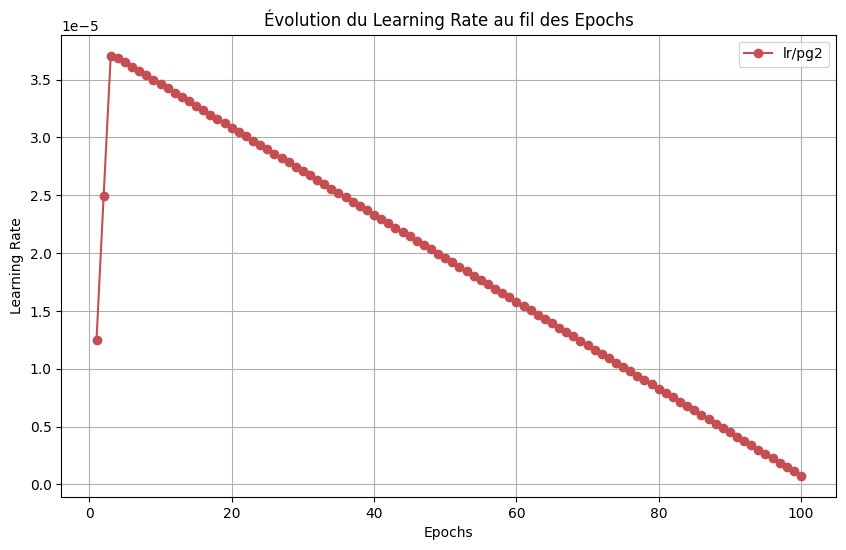

In [26]:
# Tracer la courbe des Learning Rates
plt.figure(figsize=(10, 6))

# Tracer pour chaque groupe
plt.plot(df["epoch"], df["lr/pg0"], marker="o", linestyle="-", color="b", label="lr/pg0")
plt.plot(df["epoch"], df["lr/pg1"], marker="o", linestyle="-", color="g", label="lr/pg1")
plt.plot(df["epoch"], df["lr/pg2"], marker="o", linestyle="-", color="r", label="lr/pg2")

# Ajouter des labels et un titre
plt.xlabel("Epochs")
plt.ylabel("Learning Rate")
plt.title("Évolution du Learning Rate au fil des Epochs")
plt.legend()

# Afficher le graphique
plt.grid(True)
plt.show()


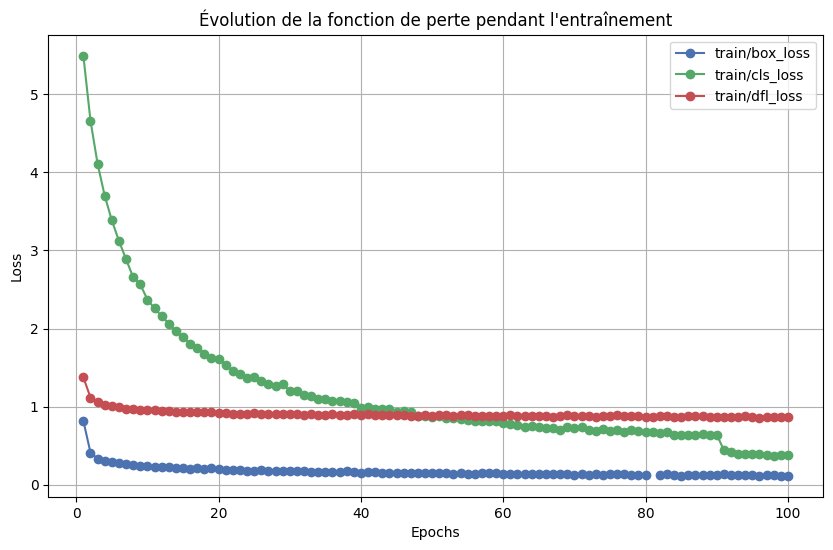

In [25]:
# La courbe des pertes
plt.figure(figsize=(10, 6))

# Tracer pour chaque type de perte
plt.plot(df["epoch"], df["train/box_loss"], marker="o", linestyle="-", color="b", label="train/box_loss")
plt.plot(df["epoch"], df["train/cls_loss"], marker="o", linestyle="-", color="g", label="train/cls_loss")
plt.plot(df["epoch"], df["train/dfl_loss"], marker="o", linestyle="-", color="r", label="train/dfl_loss")

# Les labels et un titre
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Évolution de la fonction de perte pendant l'entraînement")
plt.legend()

# Afficher le graphique
plt.grid(True)
plt.show()


In [48]:
from ultralytics import YOLO
import glob

# Charger le modèle YOLOv8 déjà entraîné
model_trained = YOLO("./runs/detect/train/weights/best.pt")  # Vérifie le chemin

# Récupérer les images de test
test_images = glob.glob("/content/drive/MyDrive/Colab Notebooks/DATASET/test/images/*.jpg")
print(f"Nombre total d'images sélectionnées : {len(test_images)}")

# Vérifier si des images sont trouvées
if len(test_images) == 0:
    print("⚠️ Aucune image trouvée. Vérifie le chemin du dossier test.")
else:
    images_prédites = 0
    images_non_prédites = 0
    batch_size = 10  # Taille du lot pour éviter l'overflow mémoire

    # Diviser en batchs de 10 images
    for i in range(0, len(test_images), batch_size):
        batch = test_images[i:i + batch_size]  # Prendre un sous-ensemble de 10 images

        try:
            results = model_trained(batch)  # Faire des prédictions par petits groupes

            for result in results:
                if result.boxes is not None and len(result.boxes) > 0:  # Si des objets sont détectés
                    images_prédites += 1
                else:
                    images_non_prédites += 1

        except Exception as e:
            print(f"⚠️ Erreur sur le batch {i // batch_size + 1}: {e}")
            images_non_prédites += len(batch)  # Considérer tout le batch comme non prédit en cas d'erreur

    # Afficher le nombre d'images prédites et non prédites
    print(f"✅ Nombre d'images prédites avec succès : {images_prédites}")
    print(f"❌ Nombre d'images sans prédictions : {images_non_prédites}")


Nombre total d'images sélectionnées : 135

0: 800x800 1 137, 1 16, 1 Crossroad intersection, 1 Oblique side road junction, 1 Roundabout, 41.3ms
1: 800x800 1 111, 1 86, 41.3ms
2: 800x800 1 128, 1 49, 1 Speed refulcation bump, 41.3ms
3: 800x800 1 110, 1 166, 1 55, 1 94, 41.3ms
4: 800x800 1 Steep uphill, 41.3ms
5: 800x800 1 116, 41.3ms
6: 800x800 1 155, 1 41, 1 69, 41.3ms
7: 800x800 1 117, 1 139, 1 166, 1 Side road junction, 1 Staggered side road junction, 41.3ms
8: 800x800 2 103s, 1 51, 1 Bus stop, 1 speed limit-60, 41.3ms
9: 800x800 1 106, 1 33, 1 55, 1 Advance direction sign exit ahead from other road than motorway or expressway, 1 axle weight limit 30tonnes, 41.3ms
Speed: 4.6ms preprocess, 41.3ms inference, 0.9ms postprocess per image at shape (1, 3, 800, 800)

0: 800x800 1 73, 1 Parking allowed for 15min, 1 speed limit-90, 35.5ms
1: 800x800 1 124, 1 52, 1 66, 1 Narrow bridge, 35.5ms
2: 800x800 1 102, 1 63, 1 66, 1 71, 1 speed limit-60, 35.5ms
3: 800x800 1 132, 1 173, 1 5, 1 Dangerous

In [1]:
#7 ENREGISTREMENT DU MODELE ENTRAINE
from google.colab import drive
import shutil


# Copier le modèle entraîné vers Google Drive
shutil.copy("./runs/detect/train/weights/best.pt", "/content/drive/MyDrive/best_yolov8.pt")

print("✅ Modèle enregistré sur Google Drive : /content/drive/MyDrive/best_yolov8.pt")


FileNotFoundError: [Errno 2] No such file or directory: './runs/detect/train/weights/best.pt'

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!git clone https://github.com/DevDiallo/Traffic-sign-recognition.git


Cloning into 'Traffic-sign-recognition'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 3 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), 964.62 KiB | 10.96 MiB/s, done.


In [3]:
!cd Traffic-sign-recognition/

In [4]:
!cp /content/drive/MyDrive/Colab NotCODE.ipynb .


cp: cannot stat '/content/drive/MyDrive/CODE.ipynb': No such file or directory
